In [54]:
import mentpy as mp
import torch
from torch.nn import Linear, Parameter
from torch_geometric.nn import MessagePassing

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 800x300 with 1 Axes>, <Axes: >)

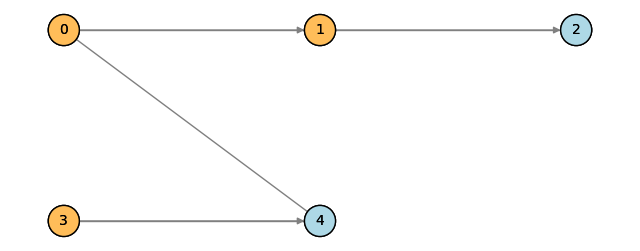

In [3]:
my_state = mp.templates.many_wires([3,2])
my_state.add_edge(0,4)
# my_state.add_edge(1,3)
mp.draw(my_state)

In [4]:
flowspace = mp.utils.FlowSpace(len(my_state), my_state.input_nodes, my_state.output_nodes)

/Users/luismantilla/Desktop/UofT/GeneralProjects/mentpy/mentpy/mbqc/flow.py:61: UserWarning: No gflow exists for this graph.
  flow_stuff = find_gflow(self.graph, self.input_nodes, self.output_nodes)


In [55]:
dataset = []

for node in flowspace.flow_graph_space.nodes:
    if flowspace.flow_graph_space.nodes[node]['mbqc_circuit'] is not None:
        try: 
            lieagl =  mp.utils.lie_algebra.calculate_gens_lie_algebra(flowspace.flow_graph_space.nodes[node]['mbqc_circuit'])
            dataset.append((nx.adjacency_matrix(flowspace.flow_graph_space.nodes[node]['mbqc_circuit'].graph).todense(), np.array(lieagl.matrix)))
        except:
            pass

In [58]:
len(dataset)

128

In [57]:
# store dataset in a file
torch.save(dataset, 'data/dataset.pt')

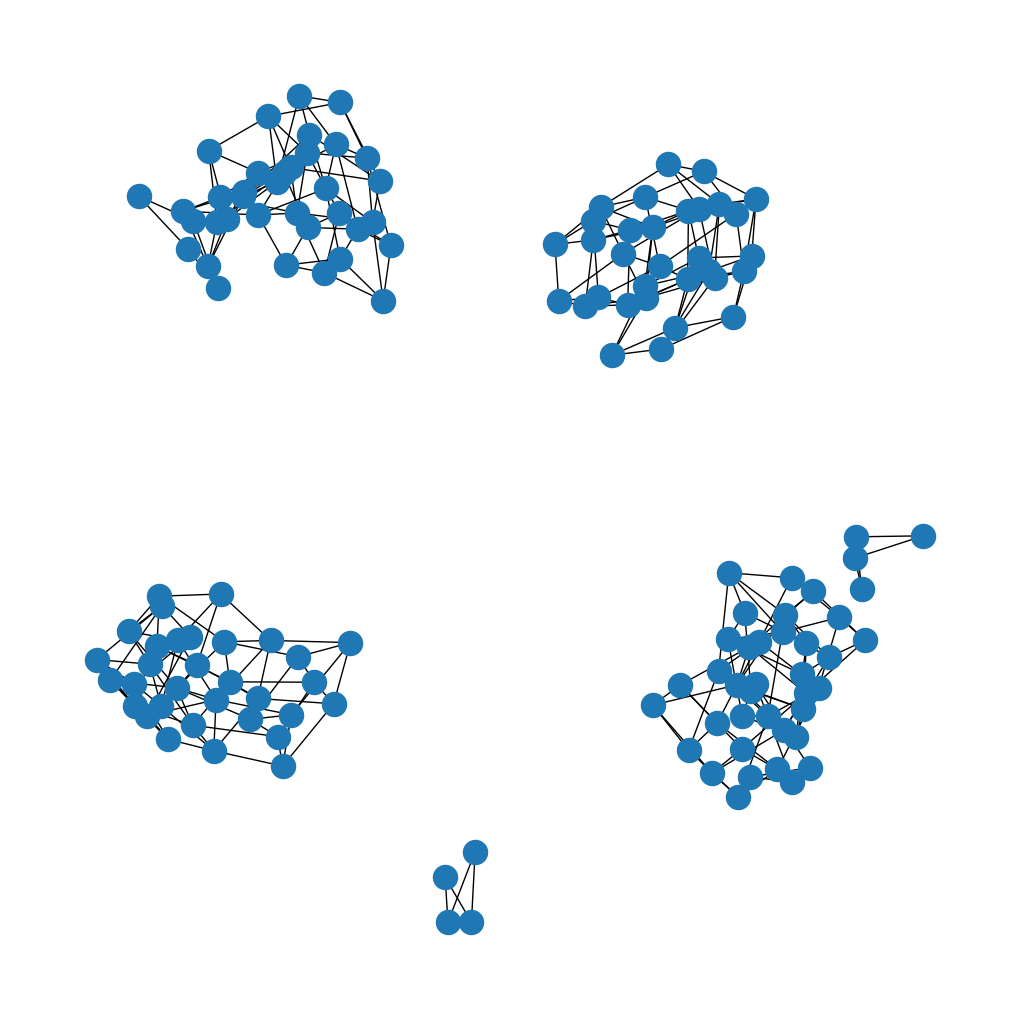

In [36]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(flowspace.flow_graph_space, k=0.2)
nx.draw(flowspace.flow_graph_space, pos=pos)